In [97]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model

In [98]:
def getDataYahoo(symbols,start_date,end_date,paraCol):
    data_source="yahoo"
    panel_data = data.DataReader(symbols, data_source, start_date, end_date)
    df_tmp = panel_data[str(paraCol)]
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    df_tmp = df_tmp.reindex(all_weekdays)
    df_clean = dataCleaning(df_tmp)
    return df_clean
    
def dataCleaning(df):
    df_tmp = df.fillna(method="ffill")
    df_clean = df_tmp.fillna(method="bfill")
    return df_clean
    
def getDataCSV(symbol):
    return pd.read_csv("data/{}.csv".format(str(symbol)), header =0, usecols=['Date','Close'],index_col=['Date'])

def plotData(df,title="",x="",y=""):
    ax = df.plot(title=title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()
    
def plotHistData(df,title="",x="",y="",b=20,mean=999,std=999):
    ax = df.hist(bins=b)
    ax.set_title = title
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    if (mean != 999) and (std != 999) :
        plt.axvline(mean,color="y",linestyle="dashed",linewidth=2)
        plt.axvline(std,color="r",linestyle="dashed",linewidth=2)
        plt.axvline(-std,color="r",linestyle="dashed",linewidth=2)
    plt.show()
    
def plotHistDataMulti(df,tickers,title="",x="",y="",b=20,mean=999,std=999):
    for symbol in tickers:
        df[str(symbol)].hist(bins=20, label=str(symbol))
    plt.legend(loc='upper right')
    plt.show()
    
def dailyReturns(df):
    dr = df.copy()
    dr[1:] = (dr[1:] / dr[:-1].values) - 1
    dr.iloc[0] = 0
    #dr.iloc[0,:] = 0
    return dr

def dailyReturnsMulti(df):
    dr = df.copy()
    dr[1:] = (dr[1:] / dr[:-1].values) - 1
    #dr.iloc[0] = 0
    dr.iloc[0,:] = 0
    return dr
    
def plotScatterMulti(df,x="",y="",polyDegree=1):
    global beta,alpha
    df.plot(kind='scatter',x=str(x),y=str(y))
    beta,alpha = np.polyfit(df[str(x)],df[str(y)],polyDegree) 
    plt.plot(df[str(x)], beta*df[str(x)] + alpha,'-', color='r')
    plt.show()
    
def predictor(X):
    Y = beta*X + alpha
    return Y


In [4]:
AAPLOnline = getDataYahoo("AAPL","2017-01-01","2017-09-28","Close")

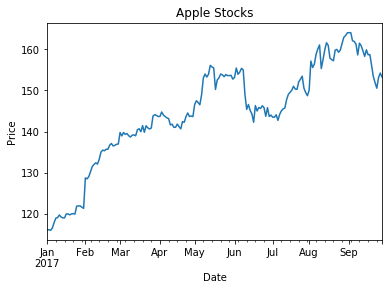

In [5]:
plotData(AAPLOnline,"Apple Stocks","Date","Price")

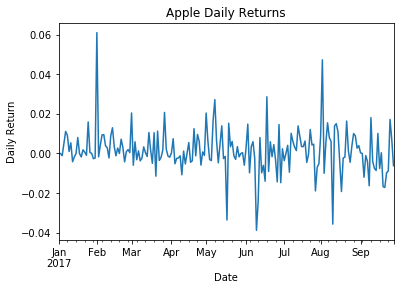

In [6]:
AAPLDailyReturns = dailyReturns(AAPLOnline)
plotData(AAPLDailyReturns,"Apple Daily Returns","Date","Daily Return")

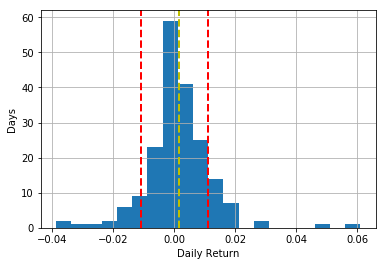

6.72634110624


In [7]:
mean = AAPLDailyReturns.mean()
std = AAPLDailyReturns.std()
plotHistData(AAPLDailyReturns,"Apple Daily Returns","Daily Return","Days",20,mean,std)
print AAPLDailyReturns.kurtosis()

In [32]:
tickers = ["SPY","GOOG"]
stocks = getDataYahoo(tickers,"2017-01-01","2017-09-20","Adj Close")

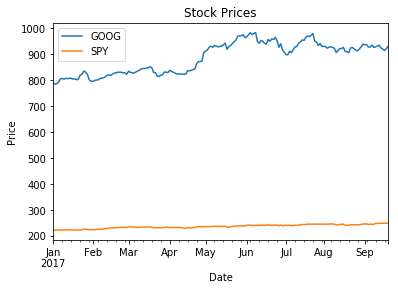

In [33]:
plotData(stocks,"Stock Prices","Date","Price")

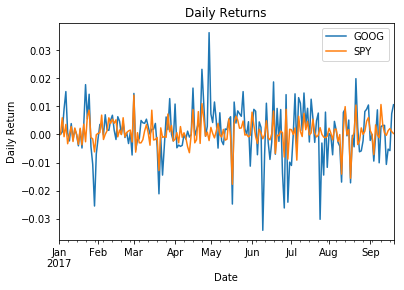

                GOOG       SPY
2017-01-02  0.000000  0.000000
2017-01-03  0.000000  0.000000
2017-01-04  0.000967  0.005949
2017-01-05  0.009048 -0.000794
2017-01-06  0.015277  0.003578
2017-01-09  0.000620 -0.003301
2017-01-10 -0.002306  0.000000
2017-01-11  0.003877  0.002826
2017-01-12 -0.001919 -0.002510
2017-01-13  0.001885  0.002296
2017-01-16  0.000000  0.000000
2017-01-17 -0.004048 -0.003524
2017-01-18  0.001815  0.002210
2017-01-19 -0.004832 -0.003704
2017-01-20  0.003547  0.003674
2017-01-23  0.017751 -0.002602
2017-01-24  0.005566  0.006412
2017-01-25  0.014323  0.008656
2017-01-26 -0.004212 -0.001045
2017-01-27 -0.010623 -0.001570
2017-01-30 -0.025495 -0.006202
2017-01-31 -0.006893 -0.000088
2017-02-01 -0.001374  0.000396
2017-02-02  0.003563  0.000659
2017-02-03  0.003707  0.006893
2017-02-06 -0.000187 -0.001788
2017-02-07  0.007026  0.000044
2017-02-08  0.001747  0.001310
2017-02-09  0.001460  0.005933
2017-02-10  0.005077  0.003946
...              ...       ...
2017-08-

In [34]:
stocksDR = dailyReturnsMulti(stocks)
plotData(stocksDR,"Daily Returns","Date","Daily Return")
print stocksDR

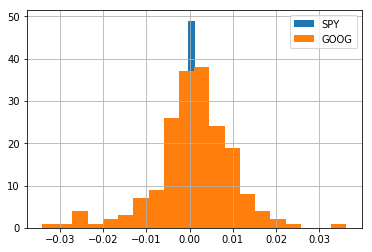

GOOG    2.644978
SPY     3.058882
dtype: float64


In [11]:
mean = stocksDR.mean()
std = stocksDR.std()
plotHistDataMulti(stocksDR,tickers,"Daily Returns","Daily Return","Days",20,mean,std)
print stocksDR.kurtosis()

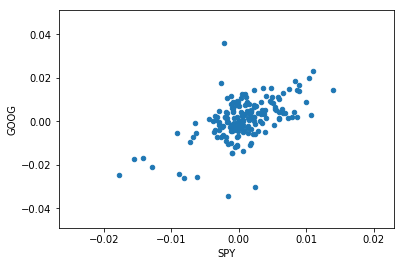

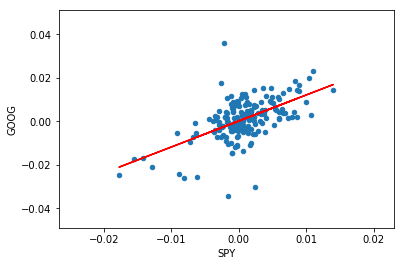

          GOOG       SPY
GOOG  1.000000  0.567536
SPY   0.567536  1.000000
0.000178505277402
1.19786648924


In [39]:
plotScatterMulti(stocksDR,"SPY","GOOG",1)
# plotScatterMulti(stocksDR,"SPY","AAPL",1)
# plotScatterMulti(stocksDR,"SPY","MSFT",1)
print stocksDR.corr(method='pearson')
print alpha
print beta

In [104]:
# Create linear regression object
regr = linear_model.LinearRegression()
stocks.reshape(-1,1)
regr.fit(stocks['SPY'],stocks['GOOG'])

AttributeError: 'DataFrame' object has no attribute 'reshape'